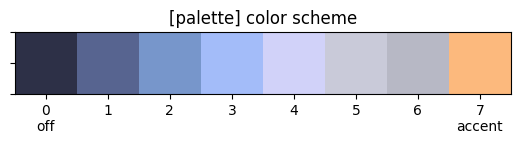

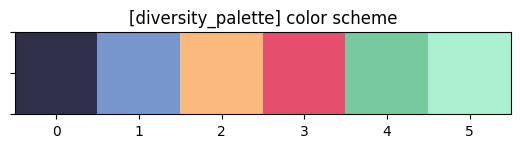

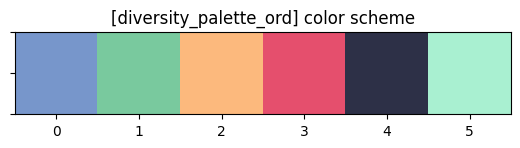

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import matplotlib as mpl
from matplotlib.lines import Line2D
import seaborn as sns
import colorgetter as cg

def darken_color(color:str, times:int = 2):
    # cg.rgb_to_hex(*cg.darker(*cg.darker(*cg.darker(*cg.hex_to_rgb(color)))))
    new_col = cg.hex_to_rgb(color)
    for _ in range(times):
        new_col = cg.darker(*new_col)
    return cg.rgb_to_hex(*new_col)

def convert_hex_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

palette = ['#2D3047', '#576490', '#7796CB', '#A3BCF9', '#D1D2F9', '#C9CAD9', '#B7B8C5', '#FCB97D']
plt.imshow(
    np.array([convert_hex_rgb(c.lstrip('#')) for c in palette])[np.newaxis, :, :]
)
labels = ['0\noff', 1, 2, 3, 4, 5, 6, '7\naccent']
plt.xticks(range(0, len(palette)), labels)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.title('[palette] color scheme')
plt.show()


diversity_palette = ['#2D3047', '#7796CB', '#FCB97D', '#E54F6D', '#79C99E', '#A9F0D1',]
plt.imshow(
    np.array([convert_hex_rgb(c.lstrip('#')) for c in diversity_palette])[np.newaxis, :, :]
)
plt.xticks(range(0, len(diversity_palette)))
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.title('[diversity_palette] color scheme')
plt.show()

diversity_palette_ord = ['#7796CB', '#79C99E', '#FCB97D', '#E54F6D', '#2D3047', '#A9F0D1',]
plt.imshow(
    np.array([convert_hex_rgb(c.lstrip('#')) for c in diversity_palette_ord])[np.newaxis, :, :]
)
plt.xticks(range(0, len(diversity_palette_ord)))
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.title('[diversity_palette_ord] color scheme')
plt.show()

## FT training stats

<Figure size 1200x1500 with 0 Axes>

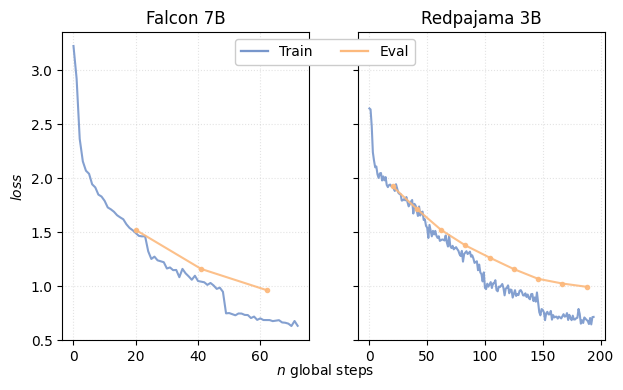

In [21]:
models_name = {
    'Falcon': 'DanielSc4/falcon-7b-instruct-FT-LoRA-8bit-test12023-06-27_18:09:48.554741',
    'RedPajama': 'DanielSc4/RedPajama-INCITE-Chat-3B-v1-FT-LoRA-8bit-test12023-06-26_00:25:41.206933',
}
train = pd.read_csv('./data/fine-tune/train loss FT.csv', index_col=0)
train = train[[models_name['Falcon'] + ' - train/loss', models_name['RedPajama'] + ' - train/loss']]
train.columns = ['Falcon', 'RedPajama']
evaluat = pd.read_csv('./data/fine-tune/eval loss FT.csv', index_col=0)
evaluat = evaluat[[models_name['Falcon'] + ' - eval/loss', models_name['RedPajama'] + ' - eval/loss']]
evaluat.columns = ['Falcon', 'RedPajama']

plt.figure(figsize = (8,10), dpi = 150)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (7,4))
ax1.set_title('Falcon 7B')
ax1.plot(train['Falcon'], label = 'Train', color = diversity_palette[1], alpha = .9, ls = '-', )
ax1.plot(evaluat['Falcon'], label = 'Eval', color = diversity_palette[2], alpha = .9, ls = '-', marker = '.')
ax1.set_ylabel(r'$\it{loss}$')


ax2.set_title('Redpajama 3B')
ax2.plot(train['RedPajama'], label = 'Train', color = diversity_palette[1], alpha = .9, ls = '-',)
ax2.plot(evaluat['RedPajama'], label = 'Eval', color = diversity_palette[2], alpha = .9, ls = '-', marker = '.')

ax1.grid(alpha = .35, linestyle = ':')
ax2.grid(alpha = .35, linestyle = ':')

line_train = Line2D([0], [0], label=r'Train', color=diversity_palette[1], linewidth= 1.65)
line_eval = Line2D([0], [0], label=r'Eval', color=diversity_palette[2], linewidth= 1.65)
handles = [line_train, line_eval]

legend = fig.legend(
    # title='Toxicity:',
    handles = handles,
    bbox_to_anchor=(0.5, 0.83, 0, 0),
    loc = 'center',
    ncol = 2,
)
legend.get_frame().set_alpha(1)     # del opacity

fig.supxlabel(r'$n$ global steps', fontsize = mpl.rcParams["axes.labelsize"])

# fig.tight_layout()
fig.savefig('./media/FT-loss.pdf', format='pdf')

## RL training stats

In [23]:
kl = pd.read_csv('./data/ppo/ppo kl.csv', index_col=0)
kl = kl[['falcon RL 7b 2nd run - objective/kl', 'red RL 3b 1st run - objective/kl']]
kl.columns = ['Falcon', 'RedPajama']

loss = pd.read_csv('./data/ppo/ppo loss.csv', index_col=0)
loss = loss[['falcon RL 7b 2nd run - ppo/loss/value', 'red RL 3b 1st run - ppo/loss/value']]
loss.columns = ['Falcon', 'RedPajama']

reward_mean = pd.read_csv('./data/ppo/ppo reward mean.csv', index_col=0)
reward_mean = reward_mean[['falcon RL 7b 2nd run - env/reward_mean', 'red RL 3b 1st run - env/reward_mean']]
reward_mean.columns = ['Falcon', 'RedPajama']

reward_std = pd.read_csv('./data/ppo/ppo reward std.csv', index_col=0)
reward_std = reward_std[['falcon RL 7b 2nd run - env/reward_std', 'red RL 3b 1st run - env/reward_std']]
reward_std.columns = ['Falcon', 'RedPajama']

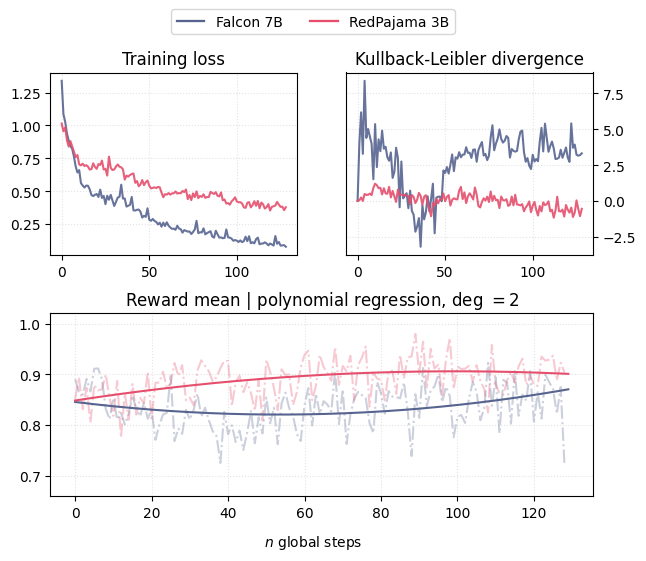

In [24]:
# ((ax1, ax2), (ax3, ax4))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (7, 5.5))
gs = axs[1, 0].get_gridspec()
for ax in axs[1, :]:
    ax.remove()

axs[0, 0].set_title('Training loss')
axs[0, 0].plot(loss['Falcon'], color = palette[1], alpha = .9, ls = '-',)
axs[0, 0].plot(loss['RedPajama'], color = diversity_palette[3], alpha = .9, ls = '-',)
axs[0, 0].grid(alpha = .35, linestyle = ':')

axs[0, 1].set_title('Kullback-Leibler divergence')
axs[0, 1].plot(kl['Falcon'], color = palette[1], alpha = .9, ls = '-',)
axs[0, 1].plot(kl['RedPajama'], color = diversity_palette[3], alpha = .9, ls = '-',)
axs[0, 1].yaxis.tick_right()
axs[0, 1].grid(alpha = .35, linestyle = ':')


axbig = fig.add_subplot(gs[1, :])
axbig.set_title(r'Reward mean | polynomial regression, deg $= 2$')
axbig.plot(reward_mean['Falcon'], color = palette[1], alpha = .3, ls = '-.',)
axbig.plot(reward_mean['RedPajama'], color = diversity_palette[3], alpha = .3, ls = '-.',)
axbig.grid(alpha = .35, linestyle = ':')
axbig.set_ylim([0.66, 1.02])


x = np.linspace(0, len(reward_mean), len(reward_mean))
# Trendline reward Falcon
z = np.polyfit(
    x, 
    reward_mean['Falcon'], deg = 2)
p = np.poly1d(z)
axbig.plot(x, p(x), color=palette[1])
# Trendline reward RedPajama
z = np.polyfit(
    x, 
    reward_mean['RedPajama'], deg = 2)
p = np.poly1d(z)
axbig.plot(x, p(x), color=diversity_palette[3])

fig.supxlabel(r'$n$ global steps', fontsize = mpl.rcParams["axes.labelsize"])

# Legend
line_train = Line2D([0], [0], label=r'Falcon 7B', color=palette[1], linewidth= 1.65)
line_eval = Line2D([0], [0], label=r'RedPajama 3B', color=diversity_palette[3], linewidth= 1.65)
handles = [line_train, line_eval]

legend = fig.legend(
    # title='Model:',
    handles = handles,
    bbox_to_anchor=(0.5, 1.008, 0, 0),
    loc = 'upper center',
    ncol = 2,
)

fig.subplots_adjust(hspace = 0.32)
fig.savefig('./media/RL-stats.pdf', format='pdf')

# Plots interpretability

In [2]:
def _get_offsets_ci(dependencies: np.array, z = 1.96):
    offsets = np.nanstd(dependencies, axis = 0) / np.sqrt(np.invert(np.isnan(dependencies)).sum(axis = 0))
    offsets *= z
    return offsets

In [3]:
import pickle
with open('./data/interpretability/dependencies_flacon.pkl', 'rb') as handle:
    dependencies_falcon = pickle.load(handle)
with open('./data/interpretability/dependencies_redpajama.pkl', 'rb') as handle:
    dependencies_redpajama = pickle.load(handle)

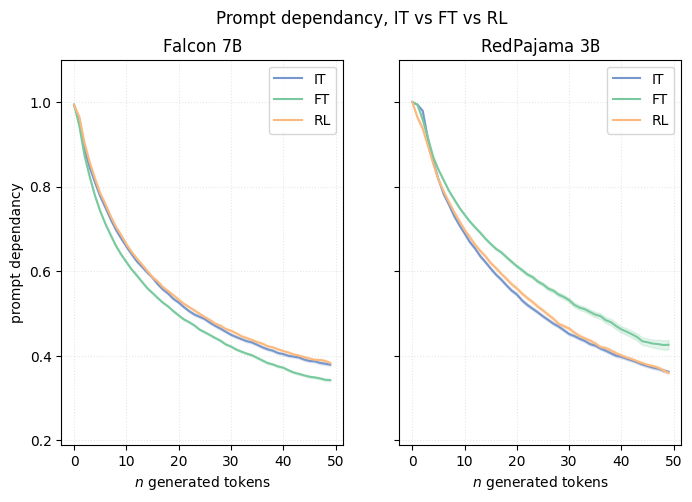

In [12]:
aggregation_fun = np.nanmean
measurements = dependencies_falcon

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (8, 5), sharey=True)
fig.suptitle('Prompt dependancy, IT vs FT vs RL')


measurements = dependencies_falcon
for k, color in zip(measurements, diversity_palette_ord):
	avgs = aggregation_fun(measurements[k], axis = 0)
	offsets = _get_offsets_ci(measurements[k])
	ax1.plot(
	    np.arange(0, len(avgs)),
	    avgs,
	    label = k,
	    color = color
	)
	ax1.fill_between(
	    np.arange(0, len(avgs)),
	    (avgs - offsets),
	    (avgs + offsets),
	    color = color, alpha = .15,
	)
ax1.set_ylim(0.19, 1.1)
ax1.set_title(r'Falcon $\tt{7B}$')
ax1.set_xlabel(r'$n$ generated tokens')
ax1.set_ylabel('prompt dependancy')
ax1.legend()
ax1.grid(alpha = .3, linestyle = ':')


measurements = dependencies_redpajama
for k, color in zip(measurements, diversity_palette_ord):
	avgs = aggregation_fun(measurements[k], axis = 0)
	offsets = _get_offsets_ci(measurements[k])
	ax2.plot(
	    np.arange(0, len(avgs)),
	    avgs,
	    label = k,
	    color = color
	)
	ax2.fill_between(
	    np.arange(0, len(avgs)),
	    (avgs - offsets),
	    (avgs + offsets),
	    color = color, alpha = .2,
	)
# ax2.set_ylim(0.19, 1.1)
ax2.set_xlabel(r'$n$ generated tokens')
ax2.set_title(r'RedPajama $\tt{3B}$')
# ax2.set_ylabel('prompt dependancy (sum)')
ax2.legend()
ax2.grid(alpha = .3, linestyle = ':')

fig.savefig('./media/prompt-dependancy.pdf', format='pdf')

In [17]:
import pickle
import colorgetter as cg

with open('./data/interpretability/dependencies_flacon.pkl', 'rb') as handle:
    dependencies_falcon = pickle.load(handle)
with open('./data/interpretability/dependencies_redpajama.pkl', 'rb') as handle:
    dependencies_redpajama = pickle.load(handle)
with open('./data/interpretability/lbls_flacon.pkl', 'rb') as handle:
    lbls_falcon = pickle.load(handle)
with open('./data/interpretability/lbls_redpajama.pkl', 'rb') as handle:
    lbls_redpajama = pickle.load(handle)

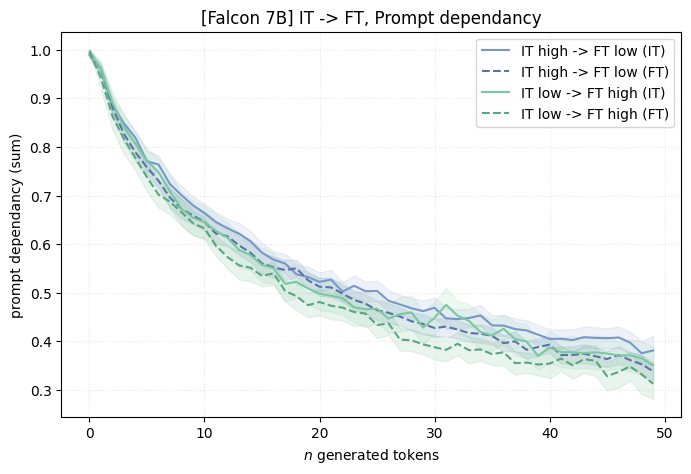

In [20]:
fig, ax = plt.subplots(figsize = (8, 5))

#### parameters
model_name = 'Falcon 7B'
lbls = lbls_falcon
aggregation_fun = np.nanmean
deps = dependencies_falcon
first_key, second_key = 'IT', 'FT'
from_to = [
    ('high', 'low'),
    ('low', 'high'),
]

ax.set_title(f'[{model_name}] {first_key} -> {second_key}, Prompt dependancy')

for color_s, (start, end) in zip(diversity_palette_ord, from_to):
    indexes = ((lbls[first_key] == start) & (lbls[second_key] == end)).flatten()
    
    ## first line (start)
    d = deps[first_key][indexes]
    avgs = aggregation_fun(d, axis = 0)
    ax.plot(
        np.arange(0, len(avgs)),
        avgs,
        label = f'{first_key} {start} -> {second_key} {end} ({first_key})',
        color = color_s,
    )
    offsets = _get_offsets_ci(d)
    ax.fill_between(
        np.arange(0, len(avgs)),
        (avgs - offsets),
        (avgs + offsets),
        color = color_s, alpha = .12,
    )
    ## second line (end)
    color_e = cg.rgb_to_hex(     # getting (two times) darker color
        *cg.darker(*cg.darker(
            *cg.hex_to_rgb(color_s)
        ))
    )
    d = deps[second_key][indexes]
    avgs = aggregation_fun(d, axis = 0)
    ax.plot(
        np.arange(0, len(avgs)),
        avgs,
        label = f'{first_key} {start} -> {second_key} {end} ({second_key})',
        color = color_e,
        ls = '--',
    )

    offsets = _get_offsets_ci(d)
    ax.fill_between(
        np.arange(0, len(avgs)),
        (avgs - offsets),
        (avgs + offsets),
        color = color_e, alpha = .12,
    )

ax.set_xlabel(r'$n$ generated tokens')
ax.set_ylabel('prompt dependancy (sum)')
ax.legend()
ax.grid(alpha = .3, linestyle = ':')

## Shannon entropy

In [32]:
import pickle
import colorgetter as cg
from scipy.stats import entropy

with open('./data/interpretability/clean_attributions_falcon.pkl', 'rb') as handle:
    attribtions_falcon = pickle.load(handle)
with open('./data/interpretability/clean_attributions_redpajama.pkl', 'rb') as handle:
    attributions_redpajama = pickle.load(handle)
with open('./data/interpretability/lbls_flacon.pkl', 'rb') as handle:
    lbls_falcon = pickle.load(handle)
with open('./data/interpretability/lbls_redpajama.pkl', 'rb') as handle:
    lbls_redpajama = pickle.load(handle)

def get_prompt_shannon_entropy(attributions, max_n_token: int = 50):
    """Return shannon entropy for each attribution in `attributions`.

    Args:
        attributions (`inseq.FeatureAttributionOutput`): attributions used to compute the prompt entropy accross each generated token.
        max_n_tok (`int`, optional): number of maximum generated tokens where dependancy is computed. Defaults to 50.

    Returns:
        `numpy.ndarray`: entropies numpy array with `[len(attributions), max_n_tok]` shape.
    """
    entropies = []
    for attr in attributions:
        p_attr_matrix = attr.target_attributions[:len(attr.source)]             # .sum(axis = 0)
        entr_per_token = entropy(p_attr_matrix / p_attr_matrix.sum(axis = 0), base=2, axis=0)[:max_n_token]      # limit at max n generated token
        entr_per_token = np.pad(entr_per_token, (0, max_n_token - len(entr_per_token)), 'constant', constant_values=np.nan)
        entropies.append(entr_per_token)
    
    return np.vstack(entropies)

FileNotFoundError: [Errno 2] No such file or directory: './data/interpretability/clean_attributions_falcon.pkl'

In [31]:
dependencies_falcon['IT'].shape

(4654, 50)

AttributeError: 'numpy.ndarray' object has no attribute 'target_attributions'

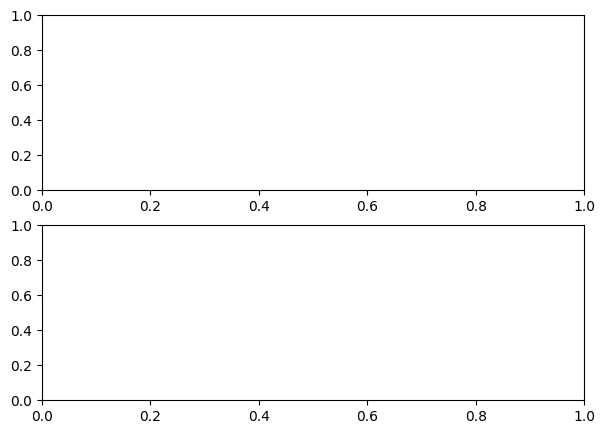

In [28]:
aggregation_fun = np.nanmean

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (7, 5))

entropy_IT = get_prompt_shannon_entropy(dependencies_falcon['IT'], 21)
entropy_FT = get_prompt_shannon_entropy(dependencies_falcon['FT'], 21)
entropy_RL = get_prompt_shannon_entropy(dependencies_falcon['RL'], 21)

attr_labels = lbls_falcon[model_name]['IT']

groups = {
    lbl: entropy_IT[(attr_labels == np.unique(attr_labels))[:, i]] 
    for i, lbl in enumerate(np.unique(attr_labels))
}

avgs = aggregation_fun(groups['high'], axis = 0)

ax1.plot(
    np.arange(0, len(avgs)), avgs,
    label = 'IT (high IT generations)',
    color = diversity_palette[0], alpha = 1, ls = '-',
)
